In [1]:
import os
import torch
import math
import numpy as np
import matplotlib.pyplot as plt
from src.pathing import *
from astropy.visualization import LogStretch,SqrtStretch,AsinhStretch,SinhStretch
from monai.transforms import *
from monai.data import CacheDataset, list_data_collate, decollate_batch, DataLoader
from src.utils.dataset import AstroDataset



In [2]:
ds=AstroDataset("hubble_base","train")

In [3]:
train_ds=ds.initalizeTorchDataset(num=12)

Loading dataset: 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]


In [13]:
remove_none = Lambda(lambda x: [elem for elem in x if elem is not None and 'image' in elem and 'noisy_image' in elem])

from src.utils.custom import PoissonNoise,RemoveZeroImage
transforms = Compose([
        LoadImaged(keys=["image"]),
        EnsureChannelFirstd(keys=["image"]),
        RandCropByPosNegLabeld(
            keys=["image"],
            label_key="image",
            spatial_size=(256, 256),
            pos=1,
            neg=0,
            num_samples=12,
            image_key="image",
            image_threshold=0.0,
        ),
        CopyItemsD(keys=["image"],
                    names=["noisy_image"]),
        PoissonNoise(keys=["noisy_image"]),
        RemoveZeroImage(),
        remove_none,

])

In [14]:
train_ds.transform=transforms
data = next(iter(train_ds))

Delete!
Delete!
Delete!
Delete!
Keep!
Delete!
Delete!
Delete!
Delete!
Delete!
Delete!
Delete!


RuntimeError: applying transform <monai.transforms.utility.array.Lambda object at 0x7f7cfc4a0820>

In [9]:
len(data)


12

TypeError: 'NoneType' object is not subscriptable

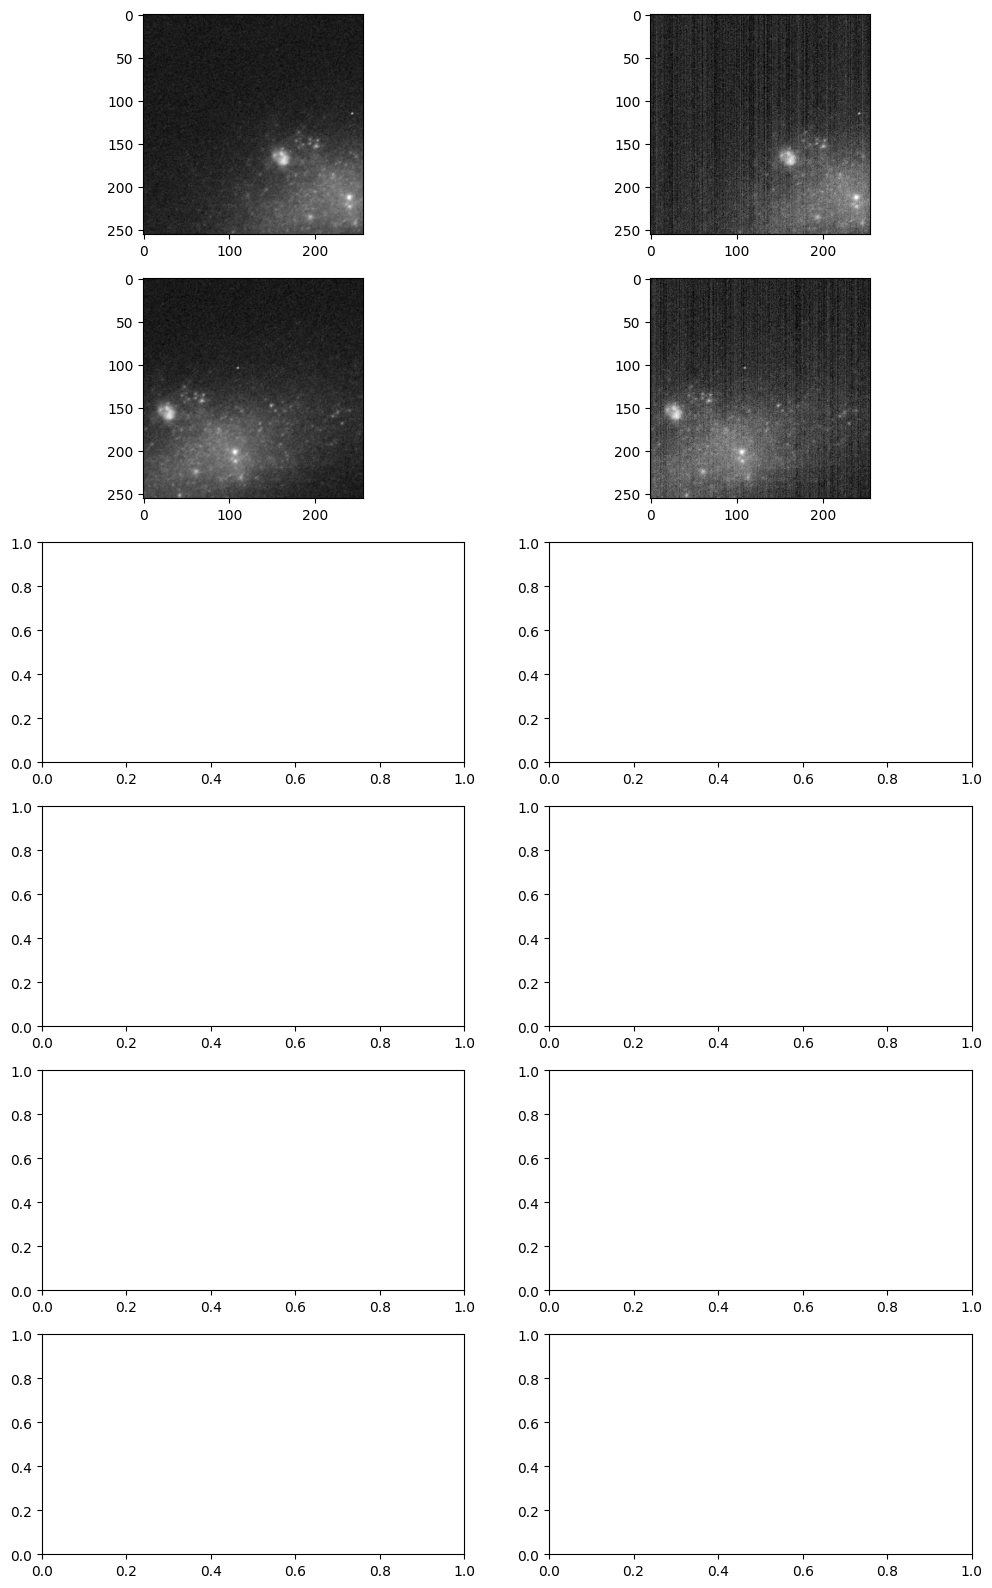

In [7]:
stretch=AsinhStretch()
fig,axs=plt.subplots(6,2,figsize=(12,20))
for j in range(6):
    axs[j,0].imshow(stretch(data[j]['image'][0]),cmap="gray")
    axs[j,1].imshow(stretch(data[j]['noisy_image'][0]),cmap="gray")

In [ ]:
loader = DataLoader(
    train_ds,
    batch_size=32,
    shuffle=True,
    num_workers=4,
)
for i, data in enumerate(loader, 0):
    inputs, labels = data['noisy_image'], data['image']
